In [1]:
# """Consumer Churn Classification .ipynb

# Automatically generated by Colab.

# Original file is located at
#     https://colab.research.google.com/drive/1hhcCt-OrQyCa8sILA4fT_shL4_LaXrOq
# """

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, norm
import warnings

In [16]:
print("Consumer Churn Classification using Machine Learning (ML)")
print("=" * 60)
print("• Algorithms used:")
print("  - Decision Tree")
print("  - Random Forest")
print("  - K-Nearest Neighbors (KNN)")
print("  - Neural Network (Keras)")
print("=" * 60)
df = pd.read_csv(r"E:\CSE422\Lab\Project\consumer_classification_dataset (1).csv")
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Consumer Churn Classification using Machine Learning (ML)
• Algorithms used:
  - Decision Tree
  - Random Forest
  - K-Nearest Neighbors (KNN)
  - Neural Network (Keras)
Dataset loaded successfully!
Dataset shape: (1500, 9)

First 5 rows:
    Age        Income  Gender Marital_Status  Credit_Score  Num_Purchases  \
0  56.0  70201.189680  Female        Married    687.761776              9   
1  69.0  51901.897395    Male         Single    712.617115              3   
2  46.0  38605.409293    Male        Married    782.299643              5   
3  32.0  49949.736955  Female         Single    697.749518              7   
4   NaN  48965.290095   Other        Married    663.155216              4   

   Membership_Years Device_Used  Churn  
0                12     Desktop      0  
1                14      Tablet      0  
2                 8      Mobile      0  
3                 1      Tablet      0  
4                 4     Desktop      1  


In [3]:
# ============================================================================
# 2. DATASET INFORMATION
# ============================================================================

print("\n" + "="*50)
print("DATASET INFORMATION")
print("="*50)

print(f"Dataset has {df.shape[1]} features and {df.shape[0]} samples.")
print(f"Dataset value types: {', '.join(df.dtypes.unique().astype(str))}")
print(f"Dataset has {df.isnull().sum().sum()} missing values.")

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))


DATASET INFORMATION
Dataset has 9 features and 1500 samples.
Dataset value types: float64, object, int64
Dataset has 300 missing values.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1425 non-null   float64
 1   Income            1425 non-null   float64
 2   Gender            1425 non-null   object 
 3   Marital_Status    1500 non-null   object 
 4   Credit_Score      1425 non-null   float64
 5   Num_Purchases     1500 non-null   int64  
 6   Membership_Years  1500 non-null   int64  
 7   Device_Used       1500 non-null   object 
 8   Churn             1500 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 105.6+ KB

Descriptive Statistics:
                Age        Income Gender Marital_Status  Credit_Score  \
count   1425.000000   1425.000000   1425           1500   1425


DATA VISUALIZATION


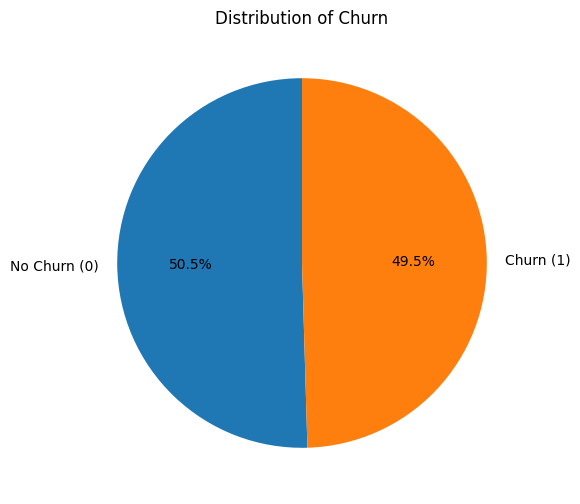

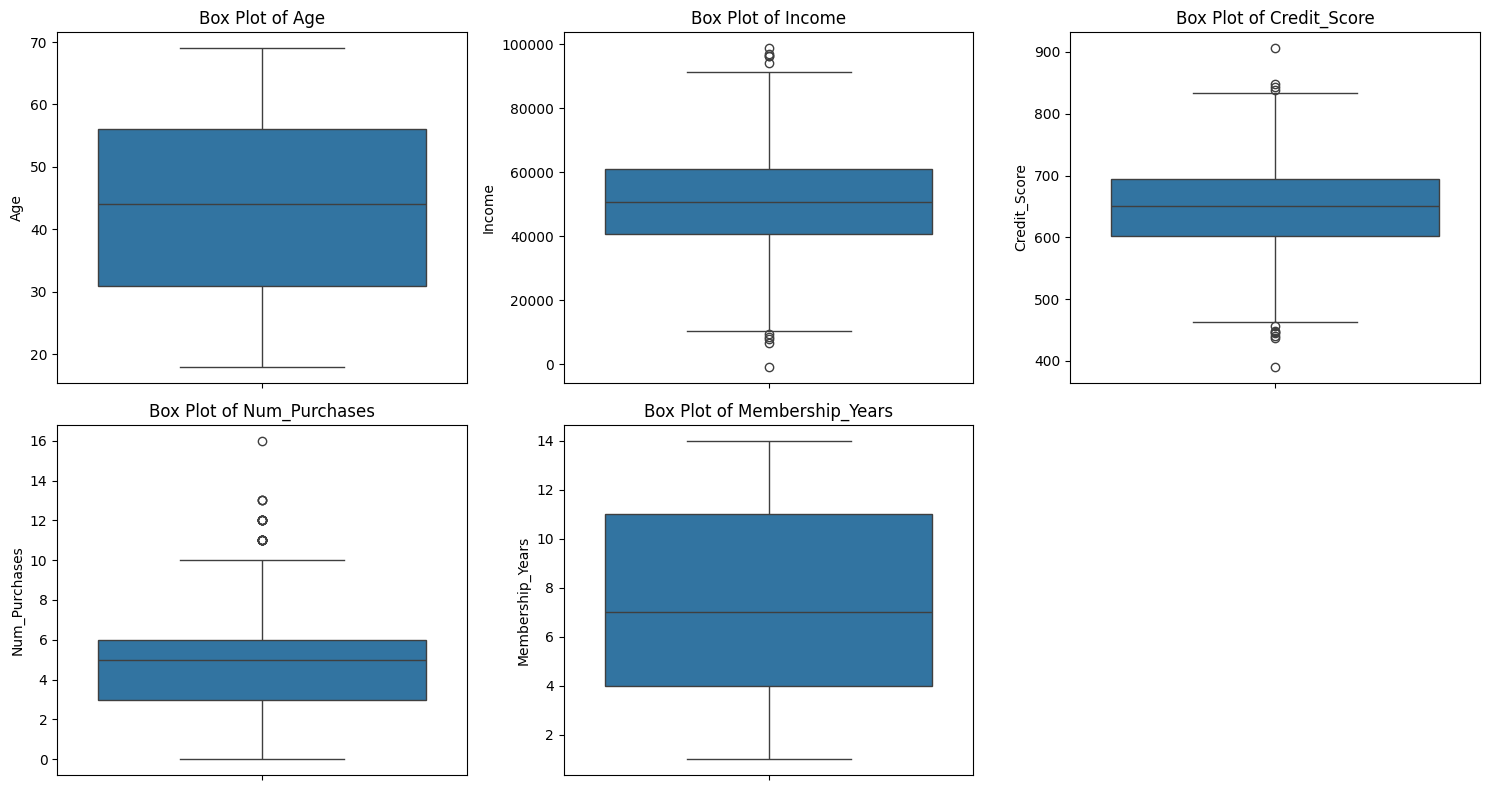

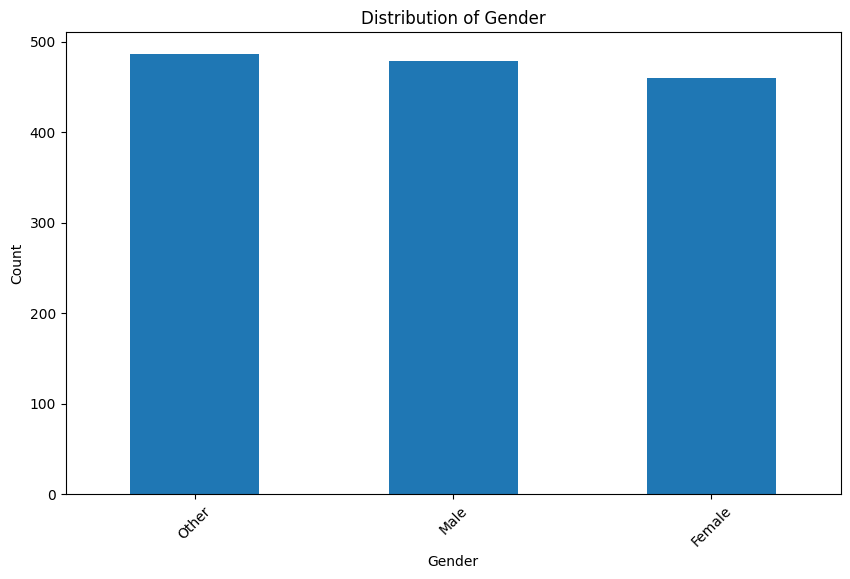

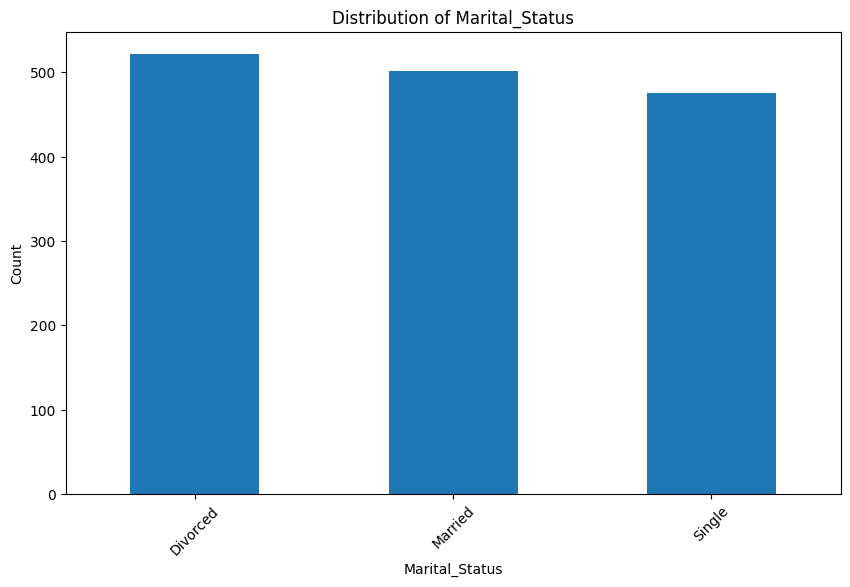

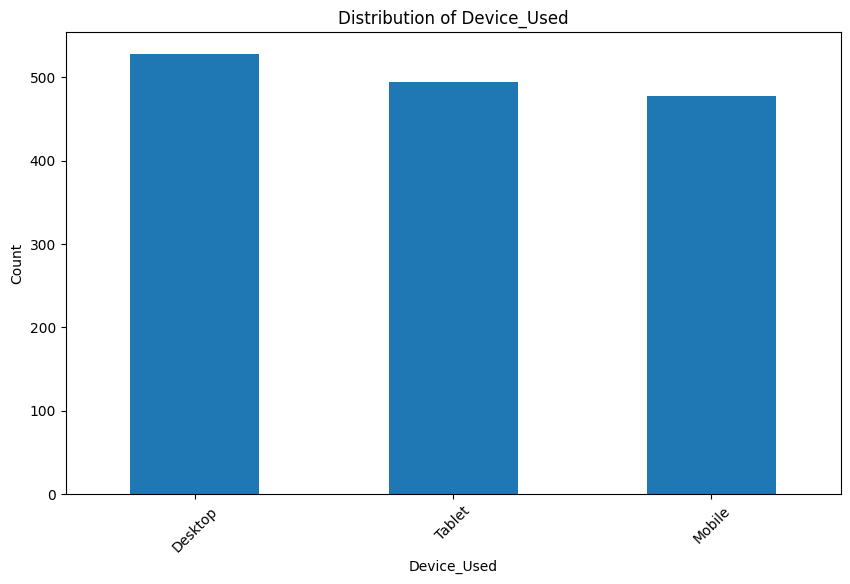

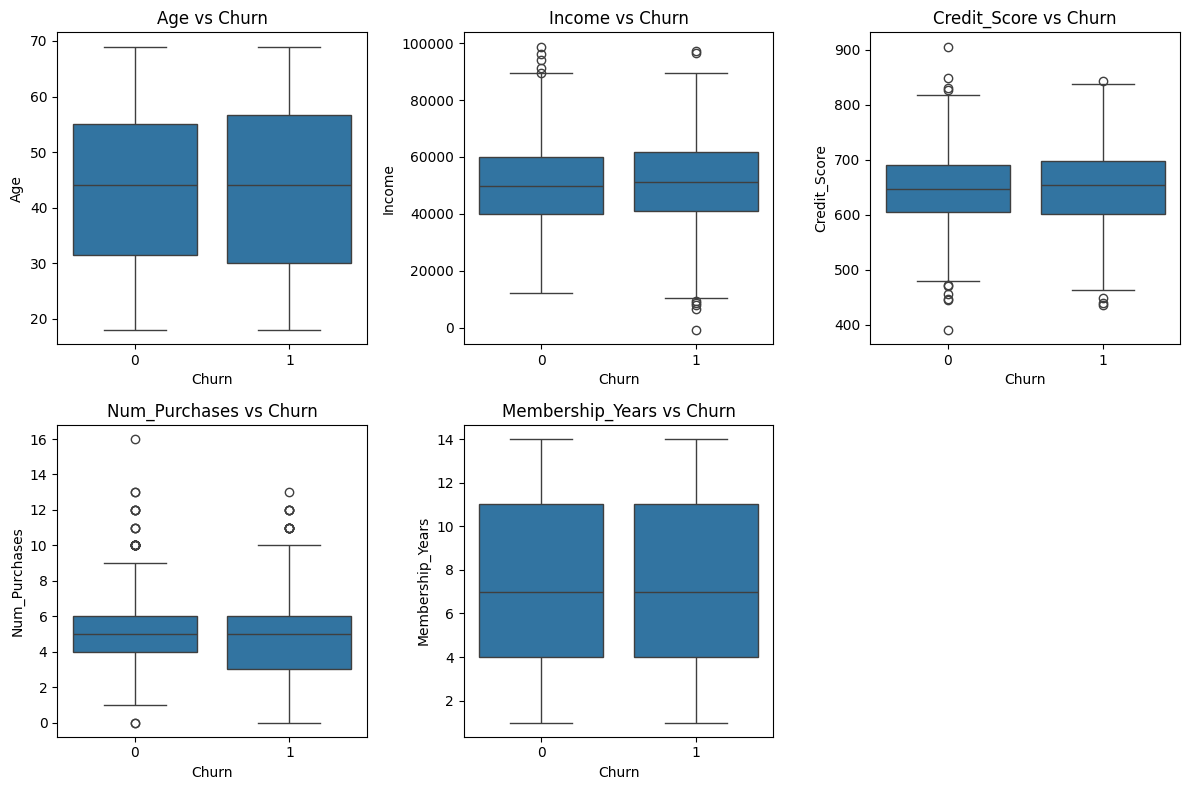

In [4]:
# ============================================================================
# 3. DATA VISUALIZATION
# ============================================================================

print("\n" + "="*50)
print("DATA VISUALIZATION")
print("="*50)
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=['No Churn (0)', 'Churn (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Churn')
plt.show()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('Churn')
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# 4. DATA CLEANING - HANDLING MISSING VALUES
# ============================================================================

print("\n" + "="*50)
print("DATA CLEANING - HANDLING MISSING VALUES")
print("="*50)

print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nHandling missing values...")

# Prepare dictionary for filling missing values
fill_values = {
    'Age': df['Age'].median(),
    'Income': df['Income'].median(),
    'Credit_Score': df['Credit_Score'].median(),
    'Gender': 'Unknown',
    'Marital_Status': 'Unknown'
}

# Replace empty strings in categorical columns before filling
df['Gender'] = df['Gender'].replace('', 'Unknown')
df['Marital_Status'] = df['Marital_Status'].replace('', 'Unknown')

# Fill missing values
df.fillna(fill_values, inplace=True)

# Print what was filled
print(f"Filled Age missing values with median: {fill_values['Age']:.2f}")
print(f"Filled Income missing values with median: {fill_values['Income']:.2f}")
print(f"Filled Credit_Score missing values with median: {fill_values['Credit_Score']:.2f}")
print("Filled Gender missing/empty values with 'Unknown'")
print("Filled Marital_Status missing/empty values with 'Unknown'")

print(f"\nAfter cleaning - Missing values: {df.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df.shape}")



DATA CLEANING - HANDLING MISSING VALUES
Missing values per column:
Age             75
Income          75
Gender          75
Credit_Score    75
dtype: int64

Handling missing values...
Filled Age missing values with median: 44.00
Filled Income missing values with median: 50671.50
Filled Credit_Score missing values with median: 650.02
Filled Gender missing/empty values with 'Unknown'

After cleaning - Missing values: 0
Dataset shape after cleaning: (1500, 9)


C:\Users\MSI\AppData\Local\Temp\ipykernel_18120\905900851.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_18120\905900851.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d


OUTLIER DETECTION AND REMOVAL


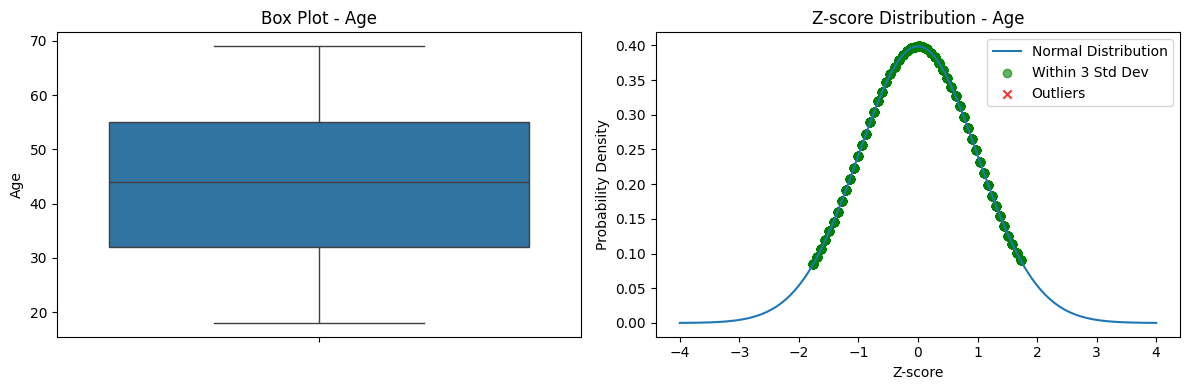

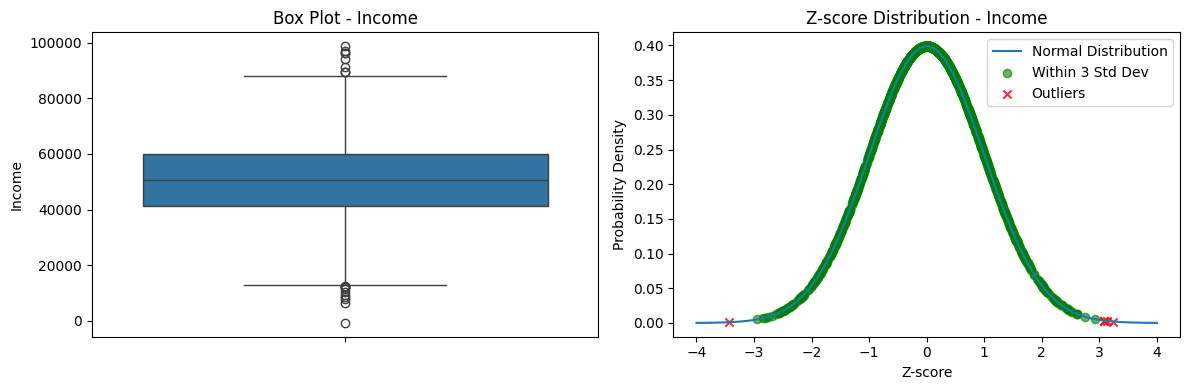

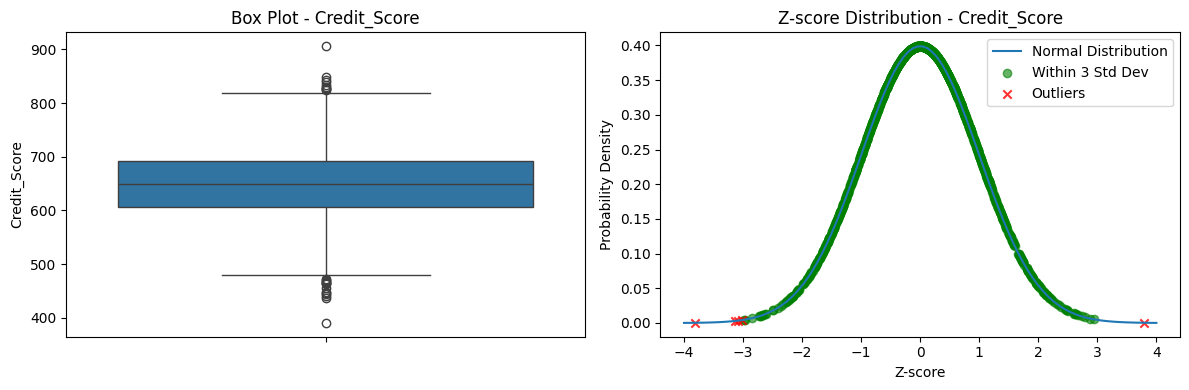

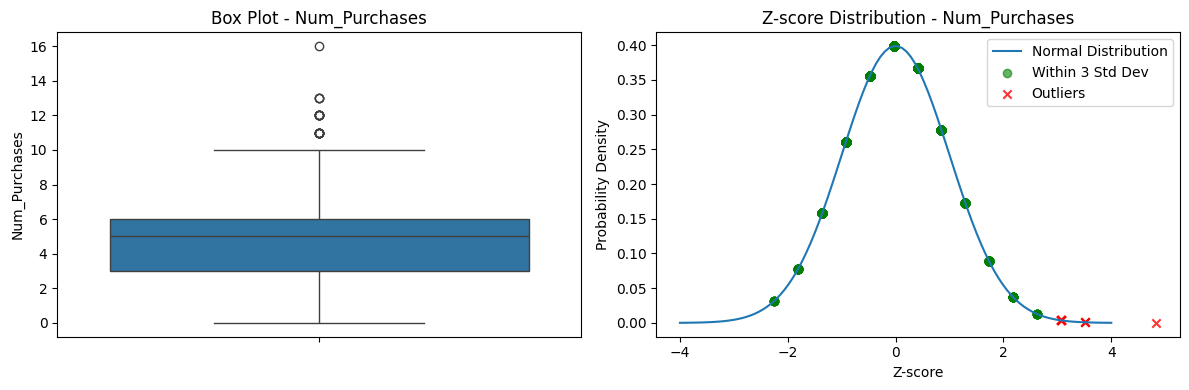

Removing outliers with Z-score threshold: 3
Original dataset shape: (1500, 9)
Dataset shape after removing outliers: (1478, 9)
Removed 22 outliers (1.47%)


In [6]:
# ============================================================================
# 5. OUTLIER DETECTION AND REMOVAL
# ============================================================================

print("\n" + "="*50)
print("OUTLIER DETECTION AND REMOVAL")
print("="*50)
selected_features = ['Age', 'Income', 'Credit_Score', 'Num_Purchases']

for feature in selected_features:
    plt.figure(figsize=(12, 4))
    z_scores = zscore(df[feature])
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot - {feature}')
    plt.subplot(1, 2, 2)
    x = np.linspace(-4, 4, 100)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, label='Normal Distribution')
    plt.scatter(z_scores[(z_scores >= -3) & (z_scores <= 3)],
                norm.pdf(z_scores[(z_scores >= -3) & (z_scores <= 3)], 0, 1),
                color='green', marker='o', label='Within 3 Std Dev', alpha=0.6)
    plt.scatter(z_scores[(z_scores < -3) | (z_scores > 3)],
                norm.pdf(z_scores[(z_scores < -3) | (z_scores > 3)], 0, 1),
                color='red', marker='x', label='Outliers', alpha=0.8)
    plt.title(f'Z-score Distribution - {feature}')
    plt.xlabel('Z-score')
    plt.ylabel('Probability Density')
    plt.legend()

    plt.tight_layout()
    plt.show()
zscore_threshold = 3
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Removing outliers with Z-score threshold: {zscore_threshold}")
print(f"Original dataset shape: {df.shape}")

z_scores = np.abs(zscore(df[numeric_columns]))
outlier_mask = np.any(z_scores > zscore_threshold, axis=1)
df_cleaned = df[~outlier_mask].copy()

print(f"Dataset shape after removing outliers: {df_cleaned.shape}")
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} outliers ({((df.shape[0] - df_cleaned.shape[0])/df.shape[0]*100):.2f}%)")

In [7]:
# ============================================================================
# 6. FEATURE ENCODING AND SCALING
# ============================================================================

print("\n" + "="*50)
print("FEATURE ENCODING AND SCALING")
print("="*50)

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_features])
feature_names = encoder.get_feature_names_out(categorical_features)
scaler = MinMaxScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_features])
X_processed = np.hstack([X_numerical_scaled, X_categorical_encoded])
all_feature_names = numerical_features + list(feature_names)

print(f"Original feature count: {X.shape[1]}")
print(f"Processed feature count: {X_processed.shape[1]}")

X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)


FEATURE ENCODING AND SCALING
Numerical features: ['Age', 'Income', 'Credit_Score', 'Num_Purchases', 'Membership_Years']
Categorical features: ['Gender', 'Marital_Status', 'Device_Used']
Original feature count: 8
Processed feature count: 12



CORRELATION ANALYSIS
Initial number of features: 12


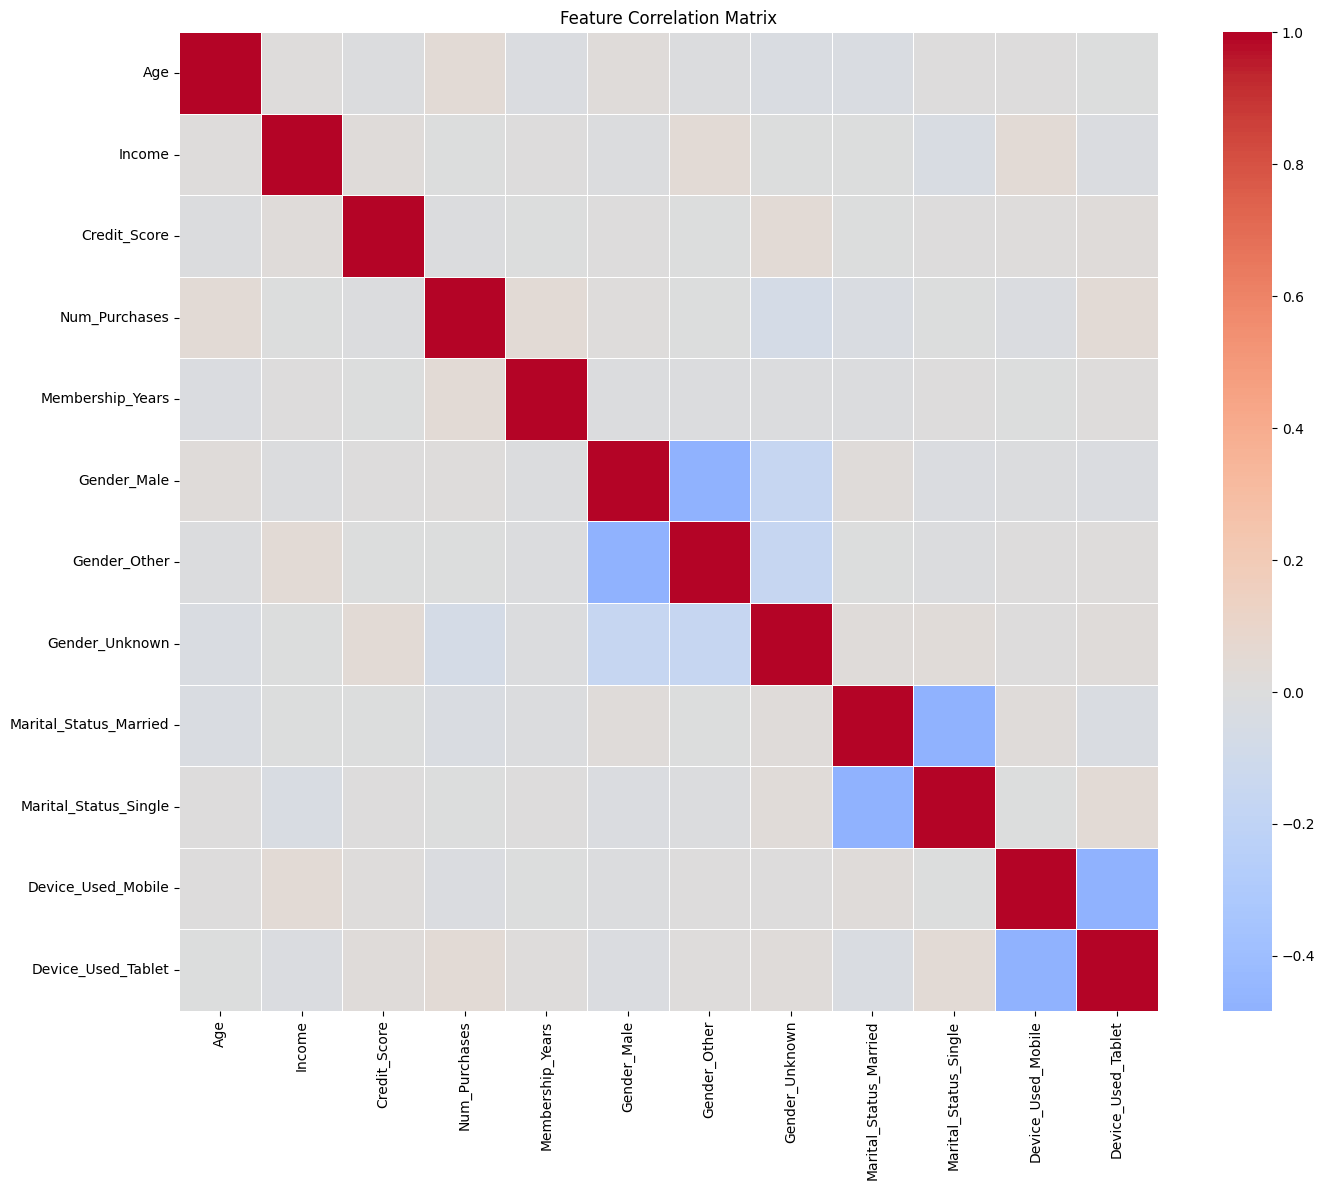

Features with high correlation (>0.8): 0
Features to remove: []
Final number of features: 12


In [8]:
# ============================================================================
# 7. CORRELATION ANALYSIS AND FEATURE REDUCTION
# ============================================================================

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

corr_matrix = X_processed_df.corr()

print(f"Initial number of features: {len(corr_matrix.columns)}")
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()
corr_threshold = 0.8
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_features.add(corr_matrix.columns[j])

print(f"Features with high correlation (>{corr_threshold}): {len(high_corr_features)}")
print(f"Features to remove: {list(high_corr_features)}")

X_final = X_processed_df.drop(columns=high_corr_features)
print(f"Final number of features: {X_final.shape[1]}")

In [9]:
# ============================================================================
# 8. TRAIN-TEST SPLIT
# ============================================================================

from sklearn.model_selection import train_test_split

print("\n" + "="*50)
print("TRAIN-TEST SPLIT")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set target distribution:")
print(y_train.value_counts(normalize=True))
print(f"Test set target distribution:")
print(y_test.value_counts(normalize=True))


TRAIN-TEST SPLIT
Training set shape: (1034, 12)
Test set shape: (444, 12)
Training set target distribution:
Churn
0    0.503868
1    0.496132
Name: proportion, dtype: float64
Test set target distribution:
Churn
0    0.504505
1    0.495495
Name: proportion, dtype: float64


In [11]:
# ============================================================================
# 9. MODEL TRAINING AND EVALUATION
# ============================================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

print("\n" + "="*60)
print("MODEL TRAINING AND EVALUATION")
print("="*60)

# Classical ML models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
}

results = {}
model_accuracy_list = []

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }
    model_accuracy_list.append(accuracy)
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

# Deep Learning Model (ANN)
print("\n" + "="*20 + " DEEP LEARNING MODEL (Keras ANN) " + "="*20)
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_final.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = ann_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Evaluate ANN
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f"\nArtificial Neural Network Accuracy: {ann_accuracy*100:.2f}%")

# Predictions and performance metrics
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
ann_conf_matrix = confusion_matrix(y_test, y_pred_ann)
ann_report_dict = classification_report(y_test, y_pred_ann, output_dict=True)

results['Artificial Neural Network (Keras)'] = {
    'model': ann_model,
    'accuracy': ann_accuracy,
    'loss': ann_loss,
    'predictions': y_pred_ann,
    'confusion_matrix': ann_conf_matrix,
    'classification_report': ann_report_dict
}
model_accuracy_list.append(ann_accuracy)

print("\nKeras ANN Performance Metrics:")
print("Confusion Matrix:")
print(ann_conf_matrix)
print(f"  Precision: {ann_report_dict['weighted avg']['precision']:.2f}")
print(f"  Recall: {ann_report_dict['weighted avg']['recall']:.2f}")
print(f"  F1-Score: {ann_report_dict['weighted avg']['f1-score']:.2f}")



MODEL TRAINING AND EVALUATION

==================== KNN ====================
Accuracy: 49.55%
Confusion Matrix:
[[118 106]
 [118 102]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       224
           1       0.49      0.46      0.48       220

    accuracy                           0.50       444
   macro avg       0.50      0.50      0.49       444
weighted avg       0.50      0.50      0.50       444


==================== Decision Tree ====================
Accuracy: 52.03%
Confusion Matrix:
[[119 105]
 [108 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       224
           1       0.52      0.51      0.51       220

    accuracy                           0.52       444
   macro avg       0.52      0.52      0.52       444
weighted avg       0.52      0.52      0.52       444


==================== Random Forest =============

C:\Users\MSI\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5068 - loss: 0.6987 - val_accuracy: 0.5090 - val_loss: 0.6938
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4903 - loss: 0.6973 - val_accuracy: 0.5383 - val_loss: 0.6926
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.6916 - val_accuracy: 0.4977 - val_loss: 0.6936
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5193 - loss: 0.6928 - val_accuracy: 0.4932 - val_loss: 0.6934
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5348 - loss: 0.6897 - val_accuracy: 0.4977 - val_loss: 0.6952
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5406 - loss: 0.6890 - val_accuracy: 0.5158 - val_loss: 0.6934
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5745 - loss: 0.6856 - val_accuracy: 0.5270 - val_loss: 0.6934
Epo

In [12]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices("GPU"))

TensorFlow version: 2.20.0
GPU available: []



MODEL COMPARISON
                               Model  Accuracy
3  Artificial Neural Network (Keras)  0.522523
1                      Decision Tree  0.520270
2                      Random Forest  0.511261
0                                KNN  0.495495


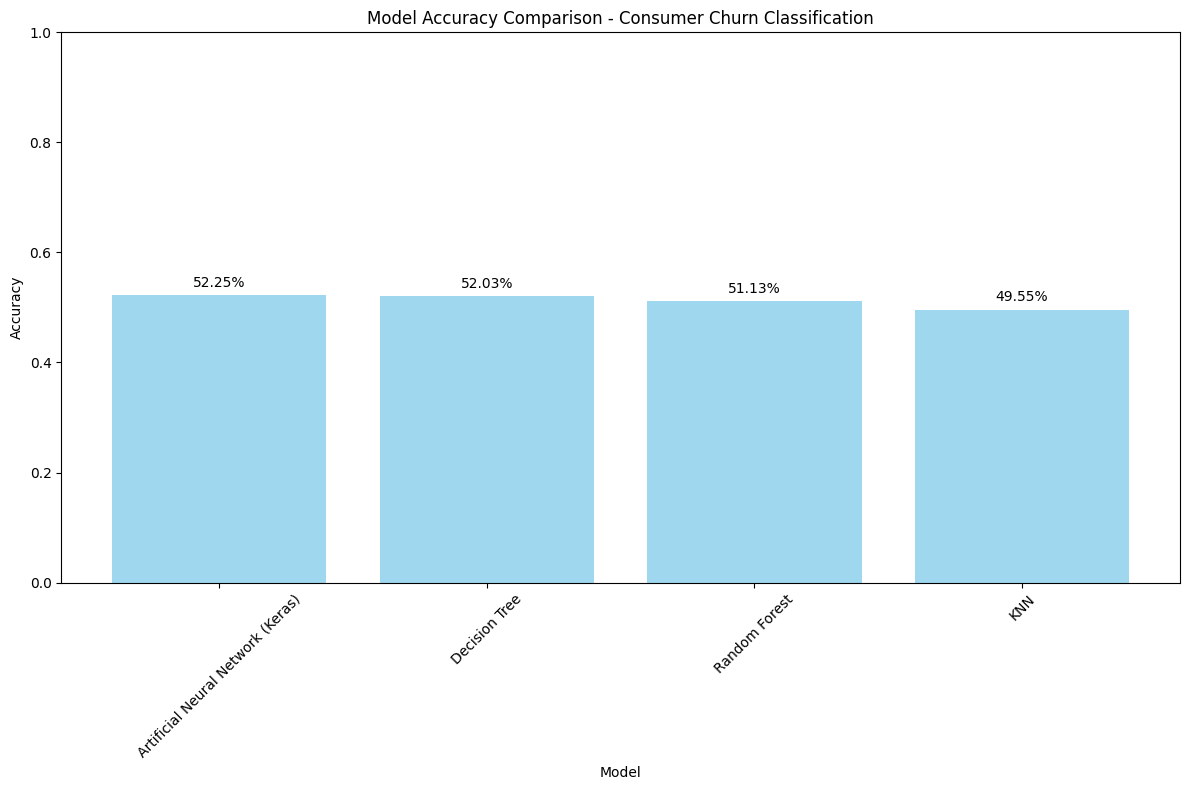

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


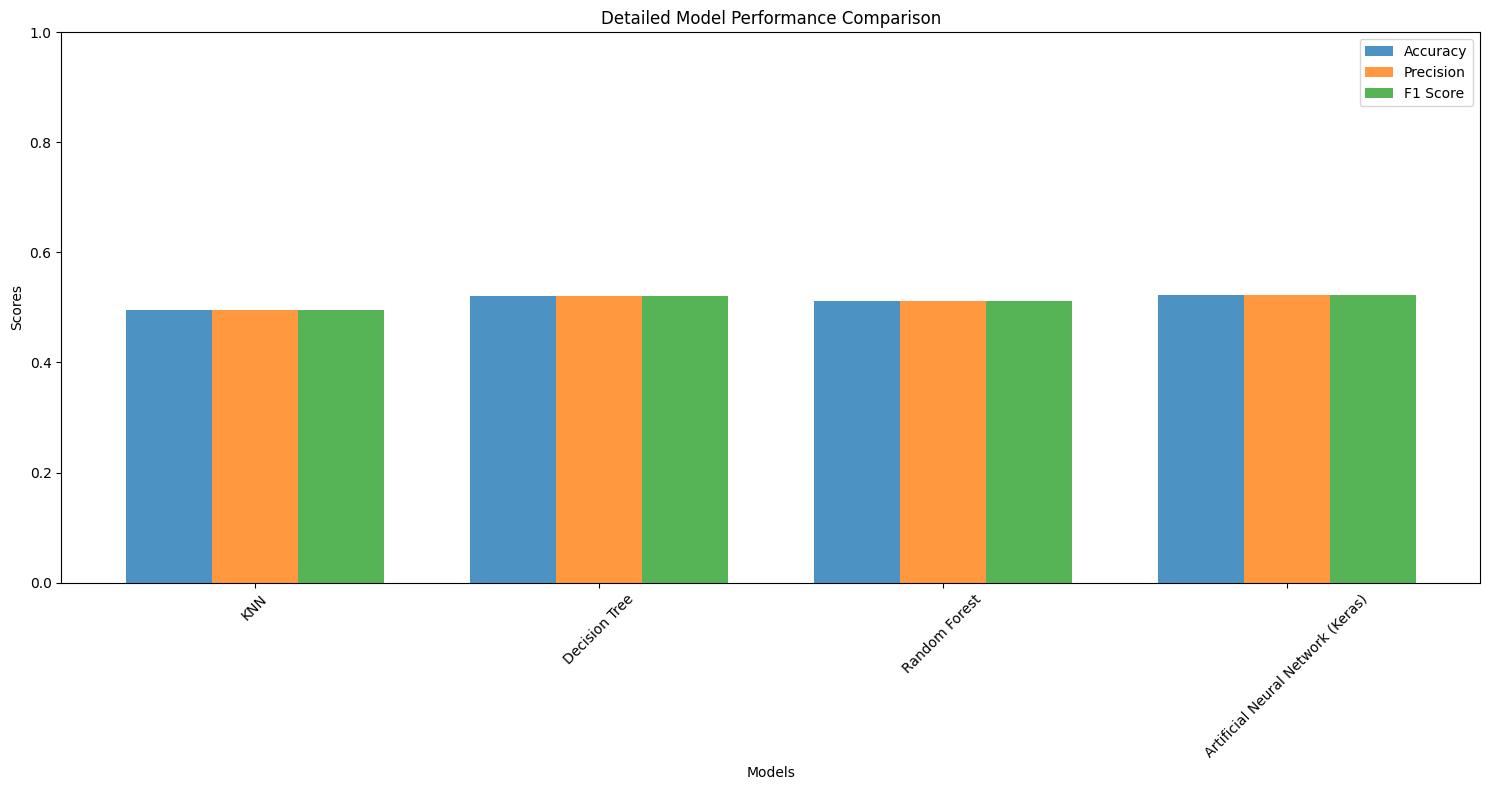

In [13]:
# ============================================================================
# 10. MODEL COMPARISON
# ============================================================================

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

comparison_df = pd.DataFrame({
    'Model': list(models.keys()) + ['Artificial Neural Network (Keras)'],
    'Accuracy': model_accuracy_list
})
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print(comparison_df)

plt.figure(figsize=(12, 8))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'],
               color='skyblue', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison - Consumer Churn Classification')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height*100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

precision_scores = []
recall_scores = []
f1_scores = []

for name in models.keys():
    report_dict = classification_report(y_test, results[name]['predictions'], output_dict=True)
    precision_scores.append(report_dict['weighted avg']['precision'])
    recall_scores.append(report_dict['weighted avg']['recall'])
    f1_scores.append(report_dict['weighted avg']['f1-score'])

# Add scores for ANN
ann_report_dict = classification_report(y_test, ann_model.predict(X_test) > 0.5, output_dict=True)
precision_scores.append(ann_report_dict['weighted avg']['precision'])
recall_scores.append(ann_report_dict['weighted avg']['recall'])
f1_scores.append(ann_report_dict['weighted avg']['f1-score'])




x = np.arange(len(models) + 1) # Add 1 for ANN
width = 0.25

fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x - width, model_accuracy_list, width, label='Accuracy', alpha=0.8)
bars2 = ax.bar(x, precision_scores, width, label='Precision', alpha=0.8)
bars3 = ax.bar(x + width, f1_scores, width, label='F1 Score', alpha=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Detailed Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(list(models.keys()) + ['Artificial Neural Network (Keras)'], rotation=45)
ax.legend()
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


FEATURE IMPORTANCE


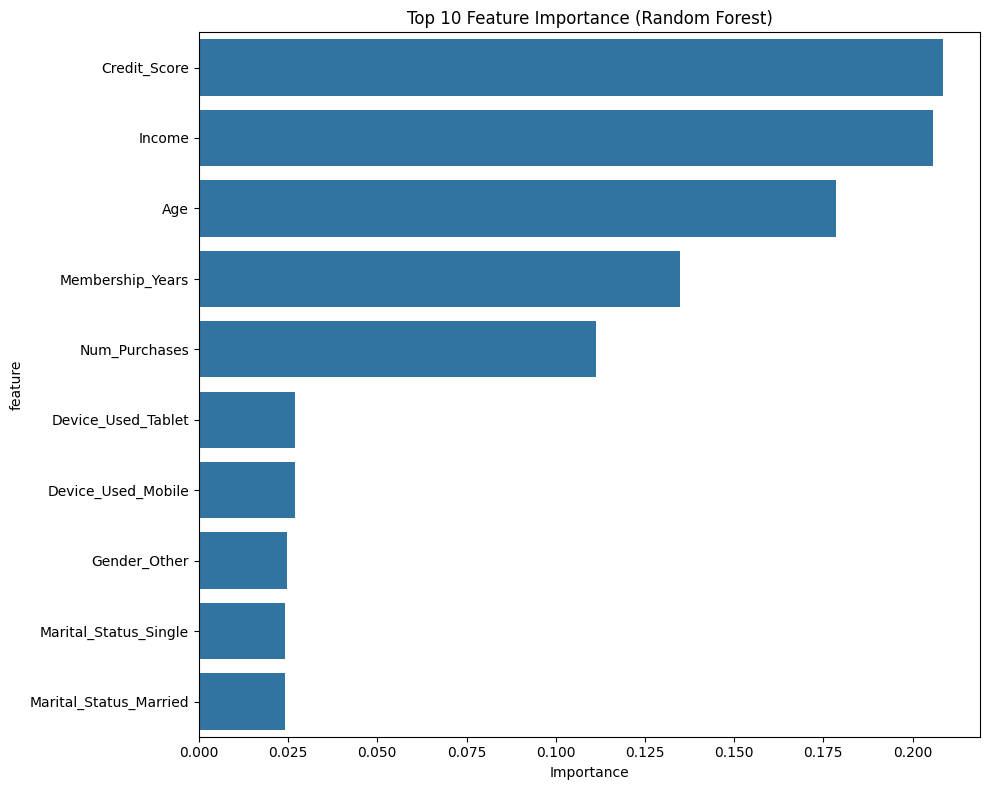

Top 10 Most Important Features (Random Forest):
                   feature  importance
2             Credit_Score    0.208494
1                   Income    0.205785
0                      Age    0.178554
4         Membership_Years    0.134873
3            Num_Purchases    0.111345
11      Device_Used_Tablet    0.027037
10      Device_Used_Mobile    0.027009
6             Gender_Other    0.024712
9    Marital_Status_Single    0.024229
8   Marital_Status_Married    0.023991


In [14]:
# ============================================================================
# 11. FEATURE IMPORTANCE (for tree-based models)
# ============================================================================

print("\n" + "="*50)
print("FEATURE IMPORTANCE")
print("="*50)

rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X_final.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='feature', x='importance')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features (Random Forest):")
print(feature_importance)

In [15]:
# ============================================================================
# 12. SUMMARY
# ============================================================================

print("\n" + "="*60)
print("ANALYSIS SUMMARY")
print("="*60)

print(f"• Dataset: Consumer Churn Classification")
print(f"• Original samples: {df.shape[0]}")
print(f"• Final samples after cleaning: {df_cleaned.shape[0]}")
print(f"• Features after preprocessing: {X_final.shape[1]}")
print(f"• Best performing model: {comparison_df.iloc[0]['Model']} ({comparison_df.iloc[0]['Accuracy']*100:.2f}%)")

print("\n• Model Performance Summary:")
for i, row in comparison_df.iterrows():
    print(f"  - {row['Model']}: {row['Accuracy']*100:.2f}%")

print(f"\n• Key insights:")
print(f"  - {((y==1).sum()/len(y)*100):.1f}% of customers churned")
print(f"  - Most important features relate to customer behavior and demographics")
print(f"  - Tree-based models performed well for this classification task")

print("\n" + "="*60)
print("Analysis completed successfully!")
print("="*60)


ANALYSIS SUMMARY
• Dataset: Consumer Churn Classification
• Original samples: 1500
• Final samples after cleaning: 1478
• Features after preprocessing: 12
• Best performing model: Artificial Neural Network (Keras) (52.25%)

• Model Performance Summary:
  - Artificial Neural Network (Keras): 52.25%
  - Decision Tree: 52.03%
  - Random Forest: 51.13%
  - KNN: 49.55%

• Key insights:
  - 49.6% of customers churned
  - Most important features relate to customer behavior and demographics
  - Tree-based models performed well for this classification task

Analysis completed successfully!
